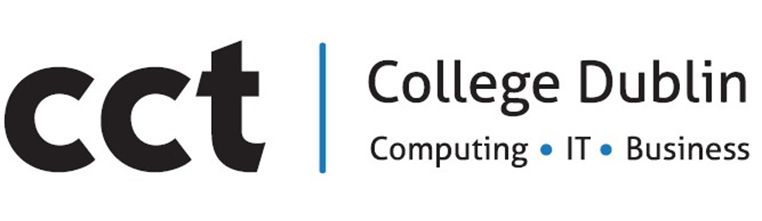

<h1 align="center">CA2 - Machine Learning</h1>
<h3 align="center">Lecturer: David McQuaid</h3>
<h3 align="center">Caio Machado de Oliveira</h3>
<h4 align="center">ID: 2020351</h4>
<h4 align="center">May/2024</h4>

In [ ]:
#Importing all libraries

import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.datasets import make_regression
from sklearn.metrics import confusion_matrix, classification_report

# TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as k
from tensorflow.keras.regularizers import l2

# NLTK and TextBlob libraries
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from textblob import download_corpora, TextBlob

# Imbalanced-learn library
from imblearn.over_sampling import SMOTE

In [ ]:
# Download NLTK corpora
nltk.download('stopwords')
nltk.download('wordnet')
download_corpora.download_all()
nltk.download('omw-1.4')


# Neural Network - Part I

In [ ]:
# importing dataset
filename = 'BankRecords.csv'
data = pd.read_csv(filename)


In [ ]:
data.head()

## EDA - Exploratory Data Analysis

### Numerical Values

When first looking at the numerical features and its attributes, it is noticed that the feature "Experience(Years)" contain negative values that might cause problems in further applications.
It was identified that the features 'ID' and 'Sort Code' are not important for this application.

In [ ]:
# Checking numerical values
data.describe()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

### Categorical Values

It is important to check que unique values to check for mispelling. '.unique()' allow us to visualize it. '.value_counts()' let us count each value on each feature.

In [ ]:
print(data['Education'].value_counts())
print(data['Education'].unique())

print("\n")
print(data['Personal Loan'].value_counts())
print(data['Personal Loan'].unique())

print("\n")
print(data['Securities Account'].value_counts())
print(data['Securities Account'].unique())

print("\n")
print(data['CD Account'].value_counts())
print(data['CD Account'].unique())

print("\n")
print(data['Online Banking'].value_counts())
print(data['Online Banking'].unique())


print("\n")
print(data['CreditCard'].value_counts())
print(data['CreditCard'].unique())


## Data Preparation

To prepare the data for a model application demand understanding of what will and won't be relevant, and may or may not affect the model accuracy.
After describing the numerical values on the EDA section, negative values were found on 'Experience(Years)' and will be removed as it might affect the model accuracy.
Was identified that 'ID' and 'Sort Code' are irrelevant for our model application.

In [ ]:
# Drop the 'ID' and 'Sort Code' columns and rename Income column for convenience
data = data.drop(['ID', 'Sort Code'], axis=1)
data = data.rename(columns={'Income(Thousands\'s)': 'Income'})

We have addressed that only the 'Experience(Years)' feature contain negative values, now we only need to count and remove the entire row from our dataset

In [ ]:
# Count the number of negative observations
negative_value = (data['Experience(Years)'] < 0).sum().sum()
print(f"Number of negative values on 'Age': {negative_value}")

In [ ]:
# Selecting rows with negative values in 'Experience(Years)' column
negative_rows = data[data['Experience(Years)'] < 0]
# Displaying the selected rows
print("Rows with negative values in 'Experience(Years)' column:")
negative_rows

In [ ]:
# Remove rows with negative values in 'Experience(Years)' column
data = data[data['Experience(Years)'] >= 0]

In [ ]:
data.info()

### Processing features

### StandardScaler () & OneHotEncoder()

Processing the features play a fundamental role in our model. StandardScaler and OneHoteEncoder work together but have diffirent functions.
StandardScaler is applied to numerical values that have different range ensuring the mean is equal to 0 and the standard deviation is equal to 1. Another option would be MinMaxScaler, which was tested previously and got worse accuracy.
OneHotEncode simply convert categorical variable into numerical, creating a binary column for each category indicating the presence or absence of that category.

In [ ]:
# Separate the target variable from the processing
income = data.pop('Income')

In [ ]:
# List of categorical and numerical features
categorical_features = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
numerical_features = ['Age', 'Experience(Years)', 'Family', 'Credit Score', 'Mortgage(Thousands\'s)']

In [ ]:
# Creating transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Use drop='first' to avoid multicollinearity

In [ ]:
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# Apply the transformations
data_preprocessed = preprocessor.fit_transform(data)

In [ ]:
# Convert the preprocessed data to a DataFrame for better readability
# Getting feature names for the new columns created by OneHotEncoder
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = numerical_features + list(encoded_columns)

In [ ]:
# Create a DataFrame
data_model = pd.DataFrame(data_preprocessed, columns=all_columns)

In [ ]:
data_model

In [ ]:
# Add target variable back to data
data_model['Income'] = income.values

In [ ]:
data_model.head()

In [ ]:
data_model.info()

# Training Data

In [ ]:
# Separate features and target variable
X = data_model.drop('Income', axis=1)
y = data_model['Income']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network

Neural Network is a subset of machine learning and is known as the backbone of deep learning algorithms. The neural part of the model mimics the neurons in the brain. Neural Network, also called Artificial Neural Network, is made up of node layers, an input layer, hidden layer (one or more), and an output layer (Raschka and Mirjalili, 2019). Each of these nodes are connected to the next one and has a weight and threshold value on them. In the image below we can see a Neural Network of 5 layers. An Input layer, three hidden layers, and an output layer (Grus, 2015).

![image.png](attachment:image.png) image: (IBM, 2024)


Neural Network support different ways of train models. The most known are feed-forward and back-propagation. Feed-forward simply goes in one direction, from input to output. On the other hand, backpropagation means going in the opposite direction. It takes the total error and goes back to each neurons distributing accordingly minimizing the error and adjusting the weights and biases of the network.  (IBM, 2024)

In our model, we used 'ReLU' for activation function because it is the most used in regression application and dealt better with the complexity of the data (Oppermann, 2021). After running many trainings checking for the best parameters, we got the best results using only one hidden layer with '64 units'. The output layer must have the units equal the expected value of the prediction which is one feature (income) in our case. The activation function used in the output layer in most regression models is 'linear' which is suitable for predicting continuous values. The optimizer uses 'Adam' which is a stochastic gradient descent, and plays a important role in the model minimizing the loss function, such as Mean Squared Error (MSE), used in our model. MSE it is defined as the average of the squared differences between the predicted and actual values.

So the model is built and ready to run. After exausting trainings, the best results was a score ranging 63% to 65%.

In [ ]:
# Define the Keras Sequential model with tuned hyperparameters
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with a tuned optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

In [ ]:
# Evaluate the model
y_pred_keras = model.predict(X_test)
mse_keras = mean_squared_error(y_test, y_pred_keras)
rmse_keras = np.sqrt(mse_keras)
r2_keras = r2_score(y_test, y_pred_keras)

print(f'Keras MSE: {mse_keras}')
print(f'Keras RMSE: {rmse_keras}')
print(f'Keras R²: {r2_keras}')

# Machine Learning Regression Model

In this assignment, we explored two very common used machine learning models: Linear Regression and Random Forest Regressor. Both models are from the Scikt-learn library and have distinct characteristics and are utilized for regression problems in order to predict a continuous target variable based on input features.



## Linear Regression


LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation (scikit-learn developers, 2019).

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables (Andriy Burkov, 2019). Its choice was a decision for modeling using a different approach in order to explorer the nuanses of the dataset when model building. The way Linear Regression model works is fitting a linear equation to the observed data, minimizing the sum of squared residuals between the observed and predicted values.


The model has a simple application method and do not demand a lot of tune for its hyperparameters.

After applying the model, the result was a R² score = 0.54 (54%).

In [ ]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression RMSE: {rmse_linear}')
print(f'Linear Regression R²: {r2_linear}')

## Random Forest Regressor

Random Forest Regressor, on the other hand, is an ensemble learning method that leverages the power of multiple decision trees to improve predictive performance and robustness. The random forest algorithm constructs a multitude of decision trees during training and outputs the mean prediction of the individual trees for regression tasks. This approach helps to mitigate overfitting, enhance model accuracy, and handle datasets with higher dimensionality (IBM, 2023). Random Forest Regressor is particularly effective in capturing complex interactions and non-linear relationships between features, making it a versatile and powerful tool for various regression problems.

Random Forests models make use of what is called bagging, which consists of creating many “copies” of the training data (each copy is slightly different from another) and then applying the weak learner to each copy to obtain multiple weak models and then combine them. (Hastie, Tibshirani and Friedman, 2009)

Our model performed well capturing the complexity of the data regardless of the fact that it is not a large dataset. The result we have got applying the model was R² score = 0.79 (79%)

In [ ]:
# Tune the parameters for make_regression
X, y = make_regression(
    n_samples=1000,        # Number of samples
    n_features=12,         # Number of features
    n_informative=6,       # Number of informative features
    noise=0.2,             # Standard deviation of Gaussian noise
    bias=0.5,              # Bias term in the underlying linear model
    random_state=42        # Seed for reproducibility
)

In [ ]:
# Create a Random Forest Regressor
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
model_RF.fit(X_train, y_train)

In [ ]:
# Evaluate the model
y_pred_RF = model_RF.predict(X_test)
mse_RF = mean_squared_error(y_test, y_pred_RF)
rmse_RF = np.sqrt(mse_RF)
r2_rf = r2_score(y_test, y_pred_RF)

print(f'Random Forest Regressor MSE: {mse_RF}')
print(f'Random Forest Regressor RMSE: {rmse_RF}')
print(f'Random Forest Regressor R²: {r2_rf}')

# Model Comparison

Based on our models after trained and tested, the Random Forest Regressor performed the best compared to Keras and Linear Regression. Despite of Keras being a Neural Network model and deals much better with complex data in general, the fact that our dataset has not a large number of obsearvation (5000 in total) may have affected the results not capturing the underlying patterns effectively.

In [ ]:
print(f'Keras MSE: {mse_keras:.2f}')
print(f'Keras R²: {r2_keras*100:.2f}%')


print(f'\nLinear Regression MSE: {mse_linear:.2f}')
print(f'Linear Regression R²: {r2_linear*100:.2f}%')


print(f'\nRandom Forest Regressor MSE: {mse_RF:.2f}')
print(f'Random Forest Regressor R²: {r2_rf*100:.2f}%')


In [ ]:
# New customer details
new_customer = {
    'Age': 30,
    'Experience(Years)': 5,
    'Sort Code': 92011,
    'Family': 2,
    'Credit Score': 1.2,
    'Mortgage(Thousands\'s)': 20,
    'Education': 'Degree',
    'Personal Loan': 'No',
    'Securities Account': 'Yes',
    'CD Account': 'No',
    'Online Banking': 'Yes',
    'CreditCard': 'No'
}

# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Apply the same preprocessing to the new customer data
new_customer_preprocessed = preprocessor.transform(new_customer_df)


# Predict income using the Random Forest model
new_customer_income_RF = model_RF.predict(new_customer_preprocessed)

# Print the results
print("Predicted income (in thousands) using Random Forest model:", new_customer_income_RF[0])



# Semantic Analysis - Part II

Semantic Analysis is a Natural Language Processing approach. It refers to analyzing the relationship of words, sentences and entire text within a give context (Nitin Indurkhya and Damerau, 2010). Using Neural Network model goes beyond analyzing only the meaning and grammar of words. It requires a set of process to extract insights and analyse the sentiment on each sentence. 

This approach can be useful when apply to businesses that deal with customer satisfaction extracting information from unstructured data. Booking.com was used to retrieve information from a Hotel and gather guests reviews from 2021 to 2023. 

The use of TensorFlow and Keras was the choice for applying the model after going through a set of tasks aiming the best model performance accuracy.


In [ ]:
file_path = 'reviews.csv'
data_review = pd.read_csv(file_path)


In [ ]:
data_review.head()

In [ ]:
data_review = data_review.drop(['Review date', 'Guest name', 'Reservation Number','Review title','Staff','Cleanliness','Location','Facilities','Comfort','Value for money','Property reply' ], axis=1)
data_review.dropna(inplace=True)

### Applying Lemmatizer

In the context of tokenization, another useful technique is word stemming, which is the process of
transforming a word into its root form. It allows us to map related words to the same stem (Raschka and Mirjalili, 2019).
The choice for WordNetLemmatizer() is the fact that it works better with different languages, which is very important in our case as we are dealing with hotel reviews and contain reviews in different languages.

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]
    return ' '.join(lemmatized_words)


In [ ]:
# Combine the 'Positive review' and 'Negative review' columns into a single 'Review' column
data_review['Review'] = data_review['Positive review'].fillna('') + ' ' + data_review['Negative review'].fillna('')

In [ ]:
# Apply lemmatization to the 'Review' column
data_review['Review'] = data_review['Review'].apply(lemmatize_text)

In [ ]:
data_review.head()

In [ ]:
data_review = data_review.drop(['Positive review','Negative review' ], axis=1)
data_review.dropna(inplace=True)

In [ ]:
data_review.head()

### Applying TextBlob

TextBlob is an open-source library in Python for processing textual data. It is a powerful package that simplifies the complexity of contextual data and extracts in-depth information from the text (Analytics Vidhya, 2018). TextBlob can handle a lot of different tasks such as Tokenization, Word frequencies, Lemmatization, Spelling correction, and so on. In our sentiment analysis case, TextBlob is useful for determining whether the input textual data has a positive, negative, or neutral tone.

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [ ]:
# Apply sentiment analysis to 'Review' column
data_review['Review Sentiment'] = data_review['Review'].apply(get_sentiment)

In [ ]:
data_review.head()

In [ ]:
data_review['Review Sentiment'].value_counts()

### Visualizing Findings

In [ ]:
# Assuming data_review is your DataFrame
data_review['Review score'] = data_review['Review score'].round().astype(int)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Review score',hue='Review score',data=data_review, palette='flare', legend=False)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Review Sentiment',hue='Review Sentiment',data=data_review, palette='flare', legend=False)

# Data Processing

We will now remove all punctuation marks, lower all the letters, remove stopwords (e.g. the, and, is),and the Unicode emoji formats (e.g. Ã°ÂŸÂ‘Â, meaning "thumbs up") found in our dataset. To accomplish this task, we will use Python's regular expression (regex) library, re , as shown below:


In [ ]:
def get_text_processing(text):
    # Remove unwanted characters and keep only letters and numbers
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize and remove stopwords
    stpword = stopwords.words('english')
    words = text.split()
    return ' '.join([word for word in words if word not in stpword])

In [ ]:
data_review['Review'] = data_review['Review'].apply(get_text_processing)

In [ ]:
data_review.head()

In [ ]:
data_review.info()

In [ ]:
data_model = data_review[['Review', 'Review Sentiment']]

### One-Hot-Encoding

The get_dummies function is a very simple way to encode the data. The get_dummies function automatically transforms all columns that are categorical. This method simply convert categorical variable into numerical, creating a binary column for each category indicating the presence or absence of that category (Müller and Guido, 2017).

In [ ]:
one_hot = pd.get_dummies(data_model["Review Sentiment"])
data_model.drop(['Review Sentiment'],axis=1,inplace=True)
data_model = pd.concat([data_model,one_hot],axis=1)
data_model.head()

In [ ]:
data_model.head()

## Spliting Training and Test

In [ ]:
X = data_model['Review'].values
y = data_model.drop('Review', axis=1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Tf-idf

The term frequency–inverse document frequency (tf–idf) is a common method in text classification . The function of this method is to give high weight to any term that appears often in a particular document.

There are two ways of applying the Tf-idf. Either applying CountVectorizer, which will produce a sparse matrix and use TfidfTransformer. Otherwise, TfidfVectorizer, which takes in the text data and does both the bag-of-words feature extraction and the tf–idf transformation. (Raschka and Mirjalili, 2019)



In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [ ]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
#X_train = X_train.toarray()
#X_test = X_test.toarray()

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Verify the distribution
print(f"Original dataset shape: {Counter(np.argmax(y_train, axis=1))}")
print(f"Resampled dataset shape: {Counter(np.argmax(y_resampled, axis=1))}")

In [ ]:
# Combine the resampled data into a DataFrame (Note: X_resampled needs to be converted to a dense format)
data_balanced = pd.DataFrame(X_resampled.toarray(), columns=vect.get_feature_names_out())
data_balanced = pd.concat([data_balanced, pd.DataFrame(y_resampled, columns=one_hot.columns)], axis=1)

## Defining Keras Model

We created a Sequential model (https://keras.io/models/sequential/) and added layers one at a time doing tests with as many combinations as we can until we are happy with our network architecture. The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to the shape of our dataset after all preparation. We ended up with three hidden layers (128, 64, and 32), and an output layer of 3, meaning we can get three possible solution (Positive, Negative and Neutral).

We used activation function referred to as 'ReLU' on the three hidden layers and the 'softmax' function in the output layer. Softmax activation in the last layer is used to support multi-class classification, since here we have three class labels
(which is why we have three neurons at the output layer)(Raschka and Mirjalili, 2019).

We specified the loss function as 'categorical_crossentropy' to evaluate a set of weights, the optimizer was 'Adam', and the metric was 'accuracy'. An early stop function was used to avoid overfitting when training the model. 




In [ ]:
model = Sequential()

model.add(Dense(units=128, input_dim=X_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
# Train the model with a different batch size and more epochs
history = model.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), epochs=20, batch_size=256, verbose=1, callbacks=[early_stop])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

In [ ]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

## Conclusion

#### Confusion Matrix

A confusion matrix is simply a square matrix that reports the counts of the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions of a classifier, which is represented by a matrix nxn with the rows being labeled with the classes and the columns labeled with the predicted classes (Provost and Fawcett, 2013). In this study, we will deal with a 3x3 Matrix, as we have 3 classes in our target value.

#### Results

After the model is fit, the model evalutation performed with an accuracy of 87%, which seems to be a good model. We can see by looking at the confusion matrix that most prediction are correctly predicted. 

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=one_hot.columns, yticklabels=one_hot.columns)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=one_hot.columns))

# References

1. Analytics Vidhya (2018). Natural Language Processing for Beginners: Using TextBlob. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/.

2. Andriy Burkov (2019). THE HUNDRED-PAGE MACHINE LEARNING BOOK. Andriy Burkov

3. Grus, J. (2015). Data Science from Scratch. ‘O’Reilly Media, Inc.’

4. Hastie, T., Tibshirani, R. and Friedman, J.H. (2009). The Elements of Statistical Learning. Springer.

5. IBM (2023). What is Random Forest? | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/topics/random-forest.

6. IBM (2024). AI vs. machine learning vs. deep learning vs. neural networks | IBM. [online] www.ibm.com. Available at: https://www.ibm.com/think/topics/ai-vs-machine-learning-vs-deep-learning-vs-neural-networks.

7. Müller, A.C. and Guido, S. (2017). Introduction to machine learning with Python : a guide for data scientists. Beijing: O’reilly.

8. Nitin Indurkhya and Damerau, F.J. (2010). Handbook of natural language processing. Boca Raton, Fl: Chapman & Hall/Crc.

9. Oppermann, A. (2021). Activation Functions in Deep Learning: Sigmoid, tanh, ReLU. [online] KI Tutorials. Available at: https://artemoppermann.com/activation-functions-in-deep-learning-sigmoid-tanh-relu/#:~:text=Activation%20functions%20add%20a%20nonlinear [Accessed 30 May 2024].

10. Provost, F. and Fawcett, T. (2013). Data science for business : what you need to know about data mining and data-analytic thinking. Sebastopol, CA: O’Reilly Media.

11. Raschka, S. and Mirjalili, V. (2019). Python machine learning : machine learning and deep learning with python, scikit-learn, and tensorflow 2. Birmingham: Packt Publishing, Limited.


### MODELS

12. Chollet, F. (2020). The Sequential model. [online] keras.io. Available at: https://keras.io/guides/sequential_model/.

13. scikit-learn.org. (n.d.). 3.2.4.3.2. sklearn.ensemble.RandomForestRegressor — scikit-learn 0.23.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.

14. scikit-learn developers (2019). sklearn.linear_model.LinearRegression — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

